In [24]:
#Use the data set from regression-data-set.csv
# fit function y - a + b cos(cx +d)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit 

In [3]:
#Read the data
df = pd.read_csv('regression-data-set.csv')
df.head()

,x,y
0,1.00,3.14
1,1.14,3.17
2,1.28,3.09
3,1.42,3.08
4,1.57,3.09


In [4]:
#Convert x and y value to array
xVal = np.array(df['x'])
yVal = np.array(df['y'])

In [5]:
#Create the fit function - returns y predicted
def curve (x,a,b,c,d):
    return a + b * np.cos(c * x + d)

In [7]:
#Do a train/test split
xtest,xtrain,ytest,ytrain = train_test_split(xVal,yVal)

In [8]:
#Fit the data using the training set and scipy.optimize.curve_fit
params,covmatrix = curve_fit(curve,xtrain,ytrain)

In [10]:
#Value of params
params

array([3.07881979e+00, 2.06635357e-01, 9.95435032e-01, 1.78460497e-03])

In [11]:
#Value of covmatrx
covmatrix

array([[ 1.65790018e-04,  2.41638390e-05,  6.50829982e-05,
        -5.91774628e-04],
       [ 2.41638390e-05,  3.66967988e-04, -3.57830560e-05,
         4.98092254e-04],
       [ 6.50829982e-05, -3.57830560e-05,  4.32856779e-04,
        -3.70865903e-03],
       [-5.91774628e-04,  4.98092254e-04, -3.70865903e-03,
         3.82414680e-02]])

In [17]:
#Calculate the MSE with the optimized parameters on the test set
ypredict = curve(xtest,*params)
MSE = mean_squared_error(ytest,ypredict)
MSE

0.0034070599262697398

In [18]:
#Formula to calculate the mse 
def calculate_mse(x,y):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y)
    params, cov = curve_fit(curve,xtrain,ytrain)
    ypred = curve(xtest,*params)
    mse = mean_squared_error(ytest,ypred)
    return mse

In [20]:
#Repeat over 100 iterations and calculate the mean and std of the MSE
errors = []
for x in range(100):
    mse = calculate_mse(xVal,yVal)
    errors.append(mse)

mean = np.mean(errors)
std = np.std(errors)

In [21]:
#mean value
mean


0.003337375297110367

In [22]:
#std value
std

0.0006220037814775241

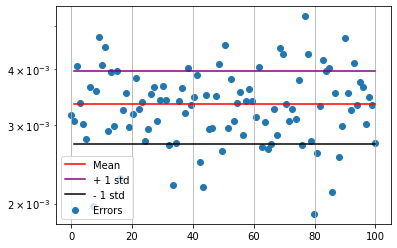

In [39]:
#plot the result
plt.scatter(np.linspace(0,100,100), errors, label='Errors')
plt.plot(np.array([1,100]), np.array([mean]*2), label='Mean', color='red')
plt.plot(np.array([1,100]), np.array([mean]*2)+std, label='+ 1 std', color='purple')
plt.plot(np.array([1,100]), np.array([mean]*2)-std, label='- 1 std', color='black')
plt.yscale('log')
plt.grid()
plt.legend()
